# Регрессионный анализ. Линейная, полиномиальная и логарифмическая регрессия.

## Линейная регрессия

In [6]:
import numpy as np
import operator
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/ahartz1/car-linear-regression/master/car_data.csv')
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


### Предположение 1: Цена автомобиля зависит от пробега

In [12]:
X = data[['Mileage']] # Пробег
Y = data['Price'] # Цена

In [13]:
X.shape

(804, 1)

In [14]:
Y.shape

(804,)

In [15]:
X.head()

,Mileage
0,8221
1,9135
2,13196
3,16342
4,19832


In [16]:
Y.head()

0    17314.103129
1    17542.036083
2    16218.847862
3    16336.913140
4    16339.170324
Name: Price, dtype: float64

In [17]:
# Создаем модель:
model = LinearRegression()

In [18]:
# Обучаем модель:
model.fit(X,Y)

LinearRegression()

In [19]:
# Получаем предсказанное значение:
y_predict = model.predict(X)

In [20]:
# Среднее отклонение по модулю:
np.abs(y_predict - Y).mean()

7596.2800225654755

In [21]:
Y.mean()

21343.143767325837

Модель довольно неточная. Среднее отклонение составляет около 30% от средней стоимости авто.

### Предположение 2: Добавим в список предикторов расход топлива и производителя

In [22]:
# Получим список производителей:
data['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [24]:
# Перекодируем номинальные данные признака 'Make':
# One-hot encoding
X = pd.get_dummies(data.loc[:, ['Mileage', 'Liter', 'Make']])
X.head()

,Mileage,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221,3.1,True,False,False,False,False,False
1,9135,3.1,True,False,False,False,False,False
2,13196,3.1,True,False,False,False,False,False
3,16342,3.1,True,False,False,False,False,False
4,19832,3.1,True,False,False,False,False,False


In [30]:
X.shape

(804, 8)

In [26]:
Y = data.loc[:, ['Price']]
Y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [27]:
model.fit(X,Y)
y_predict = model.predict(X)

In [33]:
y_predict[:6]

array([[20294.44250557],
       [20131.65686471],
       [19408.3828083 ],
       [18848.07249522],
       [18226.49493874],
       [17798.33664483]])

In [28]:
np.abs(y_predict - Y).mean()

Price    2307.880053
dtype: float64

Модель стала работать лучше. Среднее оклонение предсказанного значения составляет примерно 10% от средней цены

## Полиномиальная регрессия

### Сгенерируем свой собственный датасет для задачи полиномиальной регрессии

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [46]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

In [47]:
print(x[:6])

[-3.29215704  0.79952837 -0.93621395 -4.7226796  -3.60267397  4.93183364]


In [48]:
print("Before: ", x.shape, y.shape)

Before:  (20,) (20,)


In [49]:
# преобразуем данные, чтобы добавить новые оси:
x = x[:, np.newaxis]
y = y[:, np.newaxis]
print("After: ", x.shape, y.shape)

After:  (20, 1) (20, 1)


In [50]:
print(x[:6])

[[-3.29215704]
 [ 0.79952837]
 [-0.93621395]
 [-4.7226796 ]
 [-3.60267397]
 [ 4.93183364]]


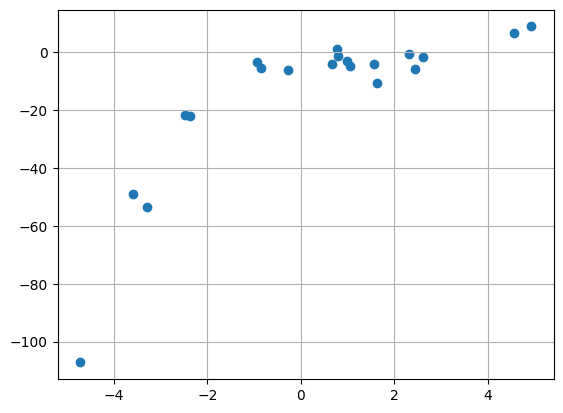

In [51]:
plt.scatter(x, y)
plt.grid()
plt.show()

### Попробуе к полученным данным применить линейную регрессию

In [52]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

R2: 0.6386750054827146
MSE:  15.908242501429998


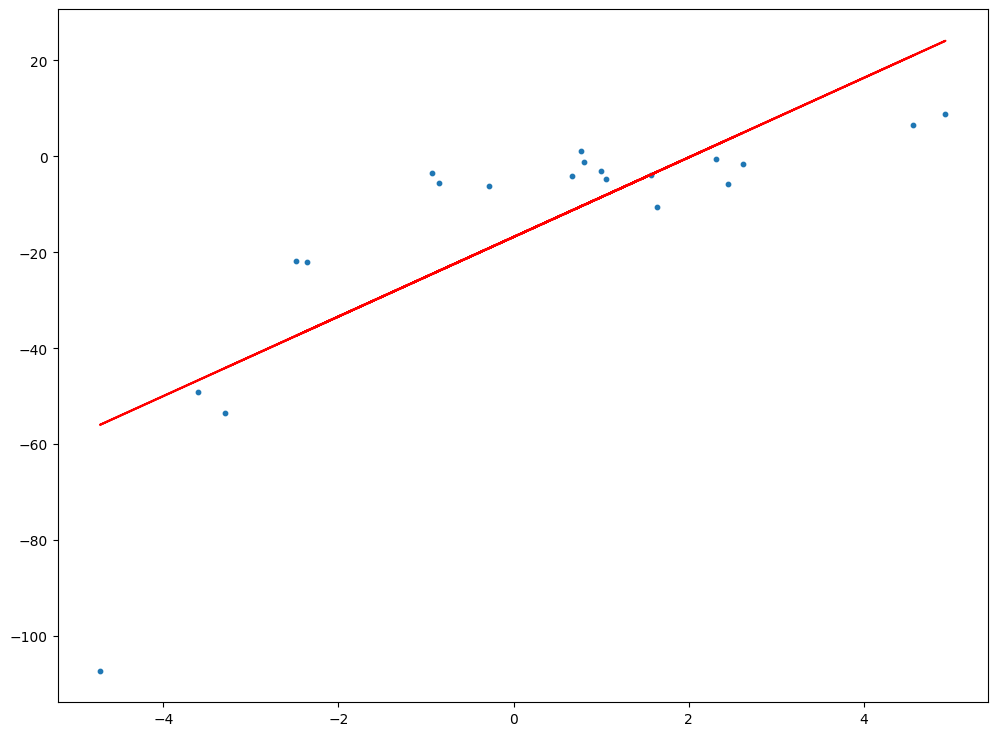

In [62]:
# Построим график:
plt.figure(figsize=(12, 9))
plt.scatter(x, y, s=10)

# считаем метрику R2
r2 = model.score(x, y)
print('R2:', r2)

# считаем метрику MSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("MSE: ", rmse)

plt.plot(x, y_pred, color='r')
plt.show()

Линейная модель описывает наши данные не очень хорошо

### Применим полиномиальную регрессию:

In [64]:
# sklearn генерирует дополнительное количество признаков для полиномиальной регрессии
polynomial_features = PolynomialFeatures(degree=2) # указываем максимальной вторую степень
x_poly = polynomial_features.fit_transform(x) # Получаем новые признаки

In [65]:
x_poly.shape

(20, 3)

In [68]:
x_poly[:6]

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305]])

In [66]:
x.shape

(20, 1)

In [69]:
x[:6]

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364]])

Теперь подаем новые признаки x_poly в линейную регрессию

R2: 0.8537647164420812
MSE:  10.120437473614711


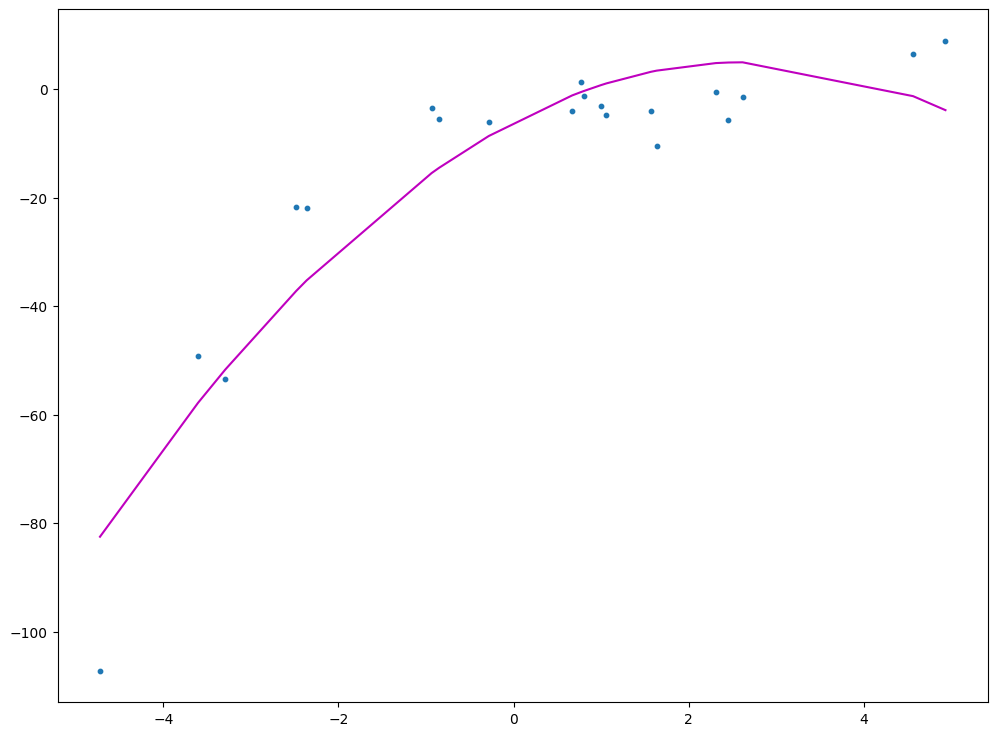

In [72]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

r2 = model.score(x_poly, y)
print('R2:', r2)
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
print("MSE: ", rmse)

plt.figure(figsize=(12, 9))
plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

plt.plot(x_, y_poly_pred, color='m')
plt.show()

### Увеличим степень

In [73]:
# sklearn генерирует дополнительное количество признаков для полиномиальной регрессии
polynomial_features = PolynomialFeatures(degree=3) # указываем максимальной третью степень
x_poly = polynomial_features.fit_transform(x) # Получаем новые признаки

R2: 0.9830071790386679
MSE:  3.449895507408725


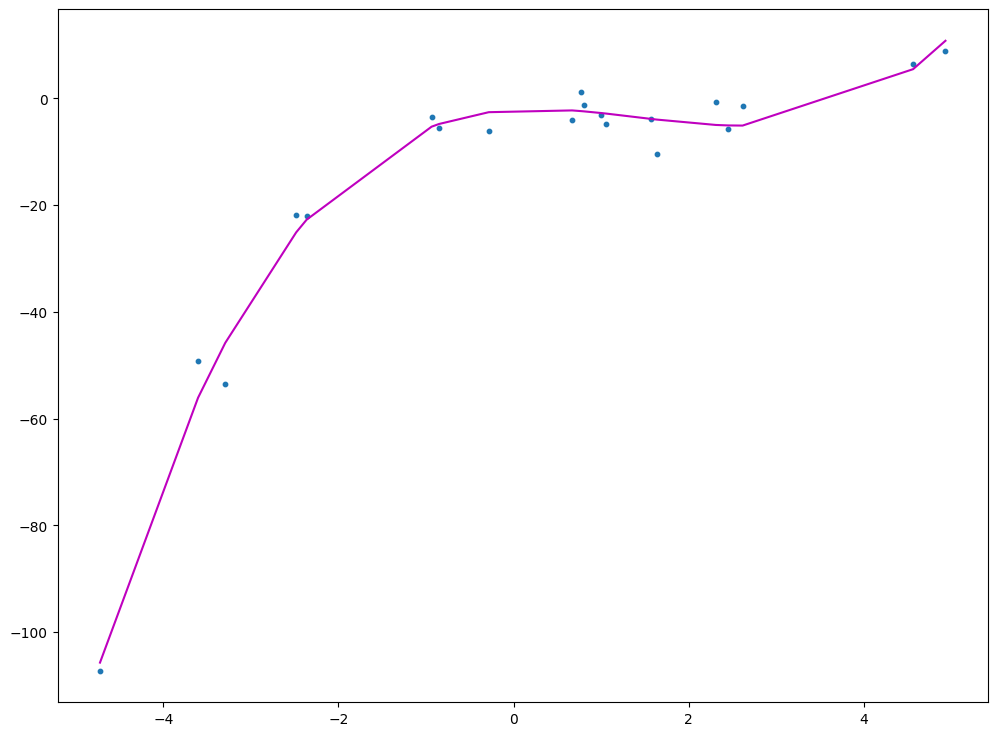

In [74]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

r2 = model.score(x_poly, y)
print('R2:', r2)
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
print("MSE: ", rmse)

plt.figure(figsize=(12, 9))
plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

plt.plot(x_, y_poly_pred, color='m')
plt.show()